In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

%matplotlib inline

from matplotlib import rc
#rc("text", usetex=True)
#plt.rcParams['figure.dpi'] = 150

In [4]:
def import_points(filepath):
    file = pd.read_csv(f"input/{filepath}",skiprows=1, names=["x", "y", "z", "m3c2", "r", "g", "b", "nx", "ny", "nz"])
    file = file[np.abs(file["m3c2"] - file["m3c2"].mean()) <= (3 * file["m3c2"].std())]
    
    return file

files = [import_points(f"{name} Peri.txt") for name in ["Syd97", "Syd04", "Syd14"]]


files[0].head()

,x,y,z,m3c2,r,g,b,nx,ny,nz
0,47473.063,35890.137,2053.672,-0.167,84,68,59,0.046542,-0.063860,0.996873
1,47467.801,35893.863,2053.564,-0.226,73,58,47,-0.102179,-0.029665,0.994324
2,47475.223,35888.848,2053.837,-0.246,79,62,49,0.108021,-0.016367,0.994014
3,47471.531,35892.660,2053.495,-0.139,77,59,46,-0.120473,-0.039407,0.991934
4,47475.027,35889.410,2053.871,-0.247,84,66,52,-0.020780,0.106085,0.994140


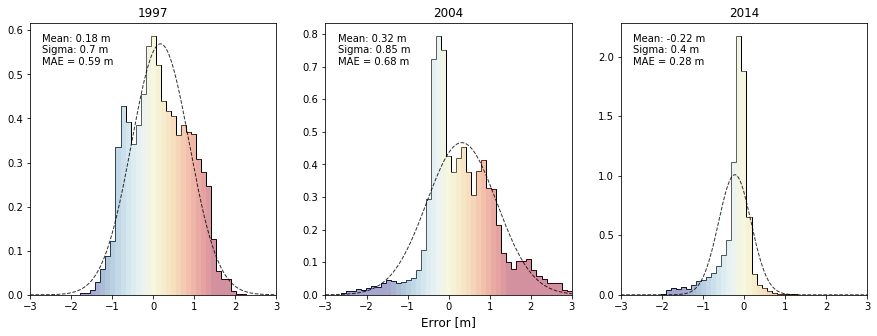

In [34]:
plt.figure(figsize=(15, 5))
names = ["1997", "2004", "2014"]
for i, v in enumerate(files):
    ax = plt.subplot(1, 3, i + 1)

    # Histogram
    cm = plt.cm.get_cmap("RdYlBu_r")  # Colormap
    
    x_min = -3
    x_max = 3
    n_bins = np.linspace(-3, 3, 50)  # Number of bins between interval
    plt.xlim((-3, 3))
    
    
    plt.hist(v["m3c2"], edgecolor="black", bins=n_bins, density=True, color=(0.95,) * 3, histtype="stepfilled")
    n, bins, patches = plt.hist(v["m3c2"], bins=n_bins, density=True)

    # Calculate bins to fill with color
    bin_centers = 0.5 * (bins[:-1] + bins[1:])    
    col = bin_centers / 3 + 0.5
    
    # Fill bins
    for c, p in zip(col, patches):  
        plt.setp(p, "facecolor", cm(c)[:-1] + (0.4,))
    
    mean = v["m3c2"].mean()
    std = v["m3c2"].std()
    mae = v["m3c2"].abs().mean()
    
    # Gaussian distribution from mean and std
    x_axis = np.arange(-10, 10, 0.0001)
    plt.plot(x_axis, norm.pdf(x_axis, mean, std), linestyle="--", c="k", lw=1, alpha=0.8)
    
    # Text and names
    stats = f"Mean: {round(mean, 2)} m\nSigma: {round(std, 2)} m\nMAE = {round(mae, 2)} m"
    plt.text(0.05, 0.9, stats, horizontalalignment="left", verticalalignment="center", transform=ax.transAxes)
    plt.title(names[i], loc="center")
    
    if i == 1:
        plt.xlabel("Error [m]", fontsize=12)
    
    

plt.savefig("errors_180302.png", dpi=300)